In [2]:
# Install required libraries
!pip install pillow==9.4.0 tensorflow numpy matplotlib

In [3]:
import os

# Define dataset paths
train_dir = "dog_dataset/train"
test_dir = "dog_dataset/test"


In [3]:
# Count images in each class
def count_images(dataset_path):
    class_counts = {}
    if os.path.exists(dataset_path):
        for breed in os.listdir(dataset_path):
            breed_path = os.path.join(dataset_path, breed)
            if os.path.isdir(breed_path):
                class_counts[breed] = len([img for img in os.listdir(breed_path)
                                           if img.lower().endswith(('.jpg', '.jpeg', '.png'))])
    return class_counts

# Display counts
print("Training Dataset:", count_images(train_dir))
print("Testing Dataset:", count_images(test_dir))


Training Dataset: {'affenpinscher': 100, 'Afghanhound': 100, 'Africanhuntingdog': 100, 'Airedale': 100, 'AmericanStaffordshireterrier': 100, 'Appenzeller': 100, 'Australianterrier': 100, 'basenji': 100, 'basset': 100, 'beagle': 100, 'Bedlingtonterrier': 100, 'Bernesemountaindog': 100, 'blackandtancoonhound': 100, 'Blenheimspaniel': 100, 'bloodhound': 100, 'bluetick': 100, 'Bordercollie': 100, 'Borderterrier': 100, 'borzoi': 100, 'Bostonbull': 100, 'BouvierdesFlandres': 100, 'boxer': 100, 'Brabancongriffon': 100, 'briard': 100, 'Brittanyspaniel': 100, 'bullmastiff': 100, 'cairn': 100, 'Cardigan': 100, 'ChesapeakeBayretriever': 100, 'Chihuahua': 100, 'chow': 100, 'clumber': 100, 'cockerspaniel': 100, 'collie': 100, 'curlycoatedretriever': 100, 'DandieDinmont': 100, 'dhole': 100, 'dingo': 100, 'Doberman': 100, 'Englishfoxhound': 100, 'Englishsetter': 100, 'Englishspringer': 100, 'EntleBucher': 100, 'Eskimodog': 100, 'flatcoatedretriever': 100, 'Frenchbulldog': 100, 'Germanshepherd': 100, 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE,
    class_mode='categorical', subset='validation'
)


Found 9600 images belonging to 120 classes.
Found 2400 images belonging to 120 classes.


# train the model 

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define paths to your dataset
train_dir = "dog_dataset/train"  # Update with your dataset directory

# Parameters
IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32
EPOCHS = 100

# Image Data Generator with Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,  # 20% of data used for validation
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)  

# Training Generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation Generator
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Define the Model
def build_model():
    model = Sequential([
        Conv2D(32, (4, 4), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (4, 4), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(train_generator.num_classes, activation='softmax')  # Dynamic number of classes
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and Summarize Model
model = build_model()
model.summary()

# Train the Model
history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# Save the Model
model.save('dog1_bree d_cnn_model.h5')

train_accuracy = history.history['accuracy'][-1]  # Get the accuracy of the last epoch
print(f"Training Accuracy: {train_accuracy:.2%}")

Found 9600 images belonging to 120 classes.
Found 2400 images belonging to 120 classes.


C:\Users\USER\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 147, 147, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 70, 70, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 78400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      40,141,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │          61,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,237,272 (153.49 MB)

 Trainable params: 40,237,272 (153.49 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\USER\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.0092 - loss: 4.9519

C:\Users\USER\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.0092 - loss: 4.9512 - val_accuracy: 0.0208 - val_loss: 4.6102
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.0288 - loss: 4.5463 - val_accuracy: 0.0454 - val_loss: 4.3984
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.0541 - loss: 4.2626 - val_accuracy: 0.0608 - val_loss: 4.2207
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.0824 - loss: 4.0305 - val_accuracy: 0.0696 - val_loss: 4.0972
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.1010 - loss: 3.8676 - val_accuracy: 0.0825 - val_loss: 4.0405
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.1201 - loss: 3.7478 - val_accuracy: 0.0817 - val_loss: 3.9989
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.1467 - loss: 3.6296 - val_accuracy: 0.0946 - val_loss: 3.9410
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3482s 12s/step - accuracy: 0.1639 - loss: 3.4922 - val_accura

300/300 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.8441 - loss: 0.5275 - val_accuracy: 0.1325 - val_loss: 8.4547
Epoch 100/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.8403 - loss: 0.5637 - val_accuracy: 0.1450 - val_loss: 8.2804


Training Accuracy: 83.63%





























# visualization   `

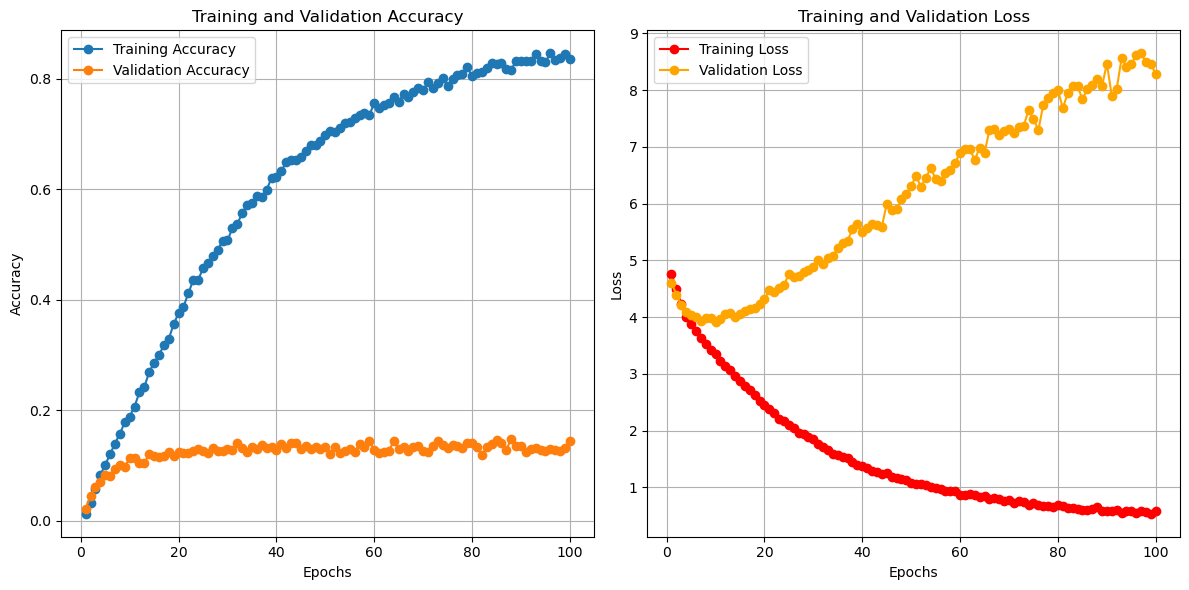

In [6]:
import matplotlib.pyplot as plt
    
# Extract accuracy and loss from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Generate epoch range
epochs_range = range(1, len(training_accuracy) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 6))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss', marker='o', color='red')
plt.plot(epochs_range, validation_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# test code

Class Indices (Index to Class): {0: 'African_hunting_dog', 1: 'Golden_retriever', 2: 'German_shepherd'}
Input Tensor Shape: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Predicted Class Index: 57
Predicted Class: Siberian_husky
Prediction Probabilities: [[4.25857991e-07 9.79213099e-11 8.58774683e-07 2.38019838e-05
  1.26449656e-10 3.57384488e-05 1.69837877e-01 3.13021147e-08
  1.67406106e-03 4.14716249e-13 3.10923991e-04 6.84706458e-10
  9.07969699e-10 3.05133113e-07 8.94047844e-07 7.56833913e-07
  3.32163498e-02 9.00483501e-05 3.86009560e-07 2.77874390e-10
  1.17877908e-02 3.10693798e-03 8.98163216e-06 4.62877078e-13
  4.00353130e-03 4.77662013e-07 1.07435071e-07 1.42291701e-05
  1.35981164e-17 8.75797559e-11 6.35640296e-09 2.03877193e-12
  2.21617869e-03 1.29620836e-09 1.59991719e-03 2.10221813e-08
  3.98820825e-03 7.06826977e-04 2.66592488e-05 2.36759732e-07
  1.30140851e-03 2.22669158e-04 9.69316016e-11 8.70620948e-04
  3.81518220e-11 1.26675263e-06 1.04206777e-08 6.71586

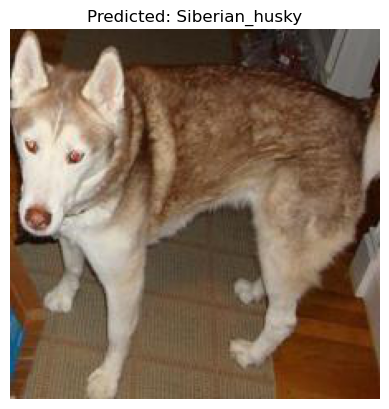

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('dog1_bree d_cnn_model.h5')  # Replace with your model name

# Define image dimensions
IMG_HEIGHT, IMG_WIDTH = 150, 150

# Manually define class indices based on training
# Ensure these match `train_generator.class_indices` during training
class_indices = {'African_hunting_dog': 0, 'Golden_retriever': 1, 'German_shepherd': 2}
index_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping

print(f"Class Indices (Index to Class): {index_to_class}")

# Function to preprocess and predict the image
def predict_image(image_path, model, index_to_class):
    try:
        # Load and preprocess the image
        image = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        input_tensor = np.expand_dims(img_to_array(image) / 255.0, axis=0)  # Normalize to [0, 1]
        
        # Debugging input shape
        print(f"Input Tensor Shape: {input_tensor.shape}")
        
        # Predict the class
        predictions = model.predict(input_tensor)
        predicted_class_index = np.argmax(predictions)  # Index of the max probability
        
        # Debugging predicted class index
        print(f"Predicted Class Index: {predicted_class_index}")
        
        # Get predicted class name from index if valid
        if predicted_class_index in index_to_class:
            predicted_class_name = index_to_class[predicted_class_index]
        else:
            # If index is not found, use the breed name from the directory
            predicted_class_name = os.path.basename(os.path.dirname(image_path))
        
        # Extract breed name from the directory name (test image path)
        breed_name_from_dir = os.path.basename(os.path.dirname(image_path))  # Extract breed from dir
        
        return predicted_class_name, predictions, breed_name_from_dir
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None, None

# Test image path (update with your actual test image path)
test_image_path = "dog_dataset/test/Siberian_husky/dog_image_7016.jpg"

# Predict and display the results
predicted_class_name, predictions, breed_name_from_dir = predict_image(test_image_path, model, index_to_class)

if predicted_class_name:
    print(f"Predicted Class: {predicted_class_name}")
    print(f"Prediction Probabilities: {predictions}")
    print(f"Breed Name from Directory: {breed_name_from_dir}")  # Display breed name from the directory

    # Display the image with prediction
    plt.imshow(load_img(test_image_path))
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')
    plt.show()
else:
    print("Prediction failed. Check the input or model.")
